# README: Zillow Home Price Prediction using Time Series Analysis

* Student: Graham Wilson
* Instructor: Rafael
* Cohort: DS041320

## Overview

A Real Estate investment firm is interested in entering the Fort Worth housing market. They've requested information on the most profitable five zip codes in terms of a forward looking 3 year return on investment (ROI).

The provided data is from Zillow's research page: https://www.zillow.com/research/data/. The data can also be found in the repository as a csv file: 'zillow_data.csv'. This dataset contains monthly home prices from 1996 through 2018 for much of the United States.

This analysis aims to use the Time Series modeling technique known as SARIMA(Seasonal Auto-regressive Inegrated Moving Average) to accurately predict and forecast ROI for the target area.


## Data

As mentioned above, the Zillow dataset contains home price values for much of the United State from April of 1996 though April of 2018. Columns include: SizeRank, RegionID, RegionName(zip code), City, State, Metro, CountyName, date(time), and value. 


Most of these columns aren't helpful for the scope of this project. Here, time, value, and zip code for the Fort Worth area are required for time series analysis. The other columns can be ignored/dropped.

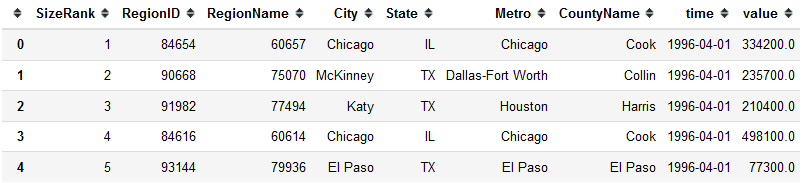

The modified dataset for the Fort Worth area include 59 unique zip codes and 272 months of home price valuations. 

# Preprocessing

The preprocessing steps include:
    
*  Check for missing data/null values - none
*  Melt data from wide to long format
*  Drop unnecessary columns from modified Fort Worth data frame
*  Set the index to datetime format for time series analysis
    

# Exploration

## Check for Stationarity

* Time series modeling for accurate forecasting requires the data to be stationary. This is achieved when the statistical properties of mean, variance, and covariance remain constant over time. Stationarity can be tested in a variety of ways, however in this case the Dickey-Fuller test will be used. The null hypothesis for this test assumes that the provided data are not stationary. To reject the null hypothesis and confirm that the data are stationary, the test statistics must be less than the critical value of p < 0.05. 

Dickey Fuller Test:

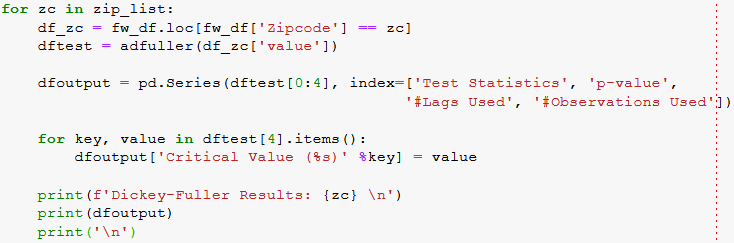

* Output Example:

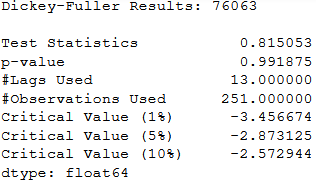

* None of the p-values for any of the zip codes fall below the critical value, so the null hypothesis holds up and none of the data are stationary.  

## Decomposition

Time series decomposition splits the time series data into three different components: seasonal, trend, and residuals. This makes it easy to visualize whether or not time series data are stationary and ready to model. Having already performed the dickey-fuller test, it is assumed at this will return what is already known - that the series is not stationary. However, these visualizations will help isolate trends and seasonality in a visual format. 

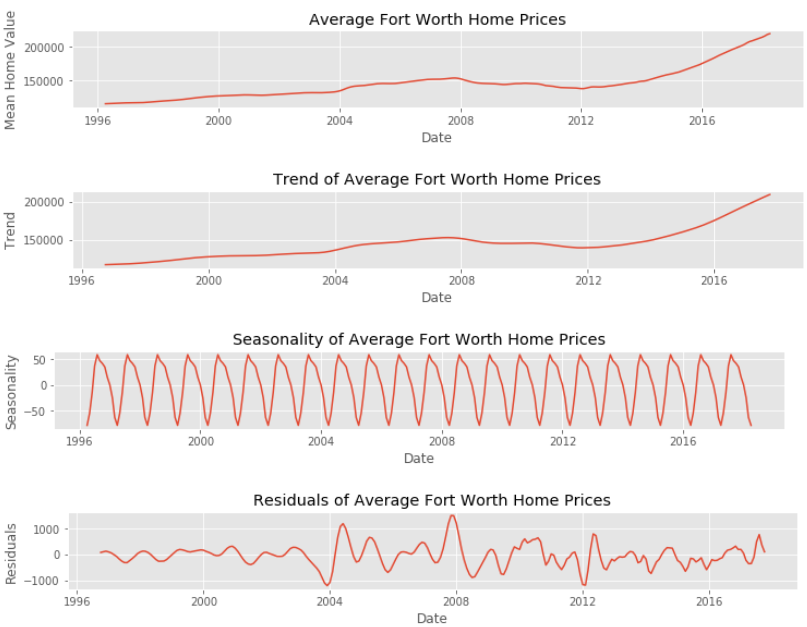

* From the above charts, it's clear that there is an overall upward trend in home prices over time, along with what looks like yearly seasonality.

## ACF and PACF

* A general assumption for time series modeling is that tomorrow's home value will be related to today's (or yesterday's) price. Both auto correlation (ACF), and partial auto correlation (PACF) are two tools that help with exactly how correlative current prices are to previous prices. ACF correlates the influence of previous price based over a given lag time, whereas PACF removes indirect correlation and measures direct influence of price between two specific observations.


* Visualizing both of these measurements help with determining the range in hyper-parameter (p, q) selection for optimal time series modeling. With p coming from the PACF graph, and q from the ACF graph.



* ACF and PACF with no lags

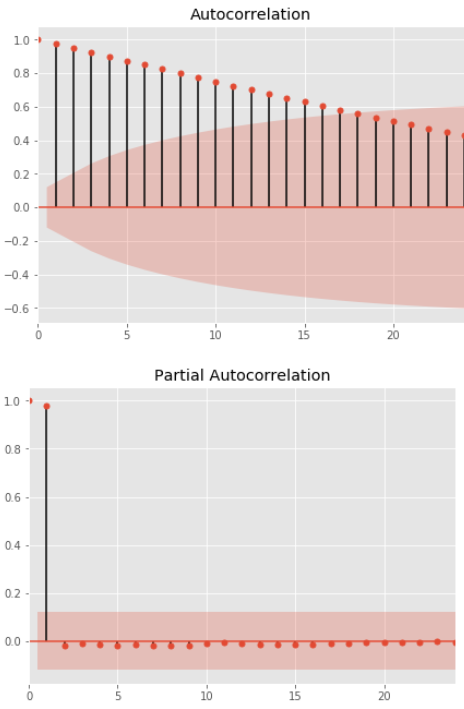

* ACF and PACF with 4 lags

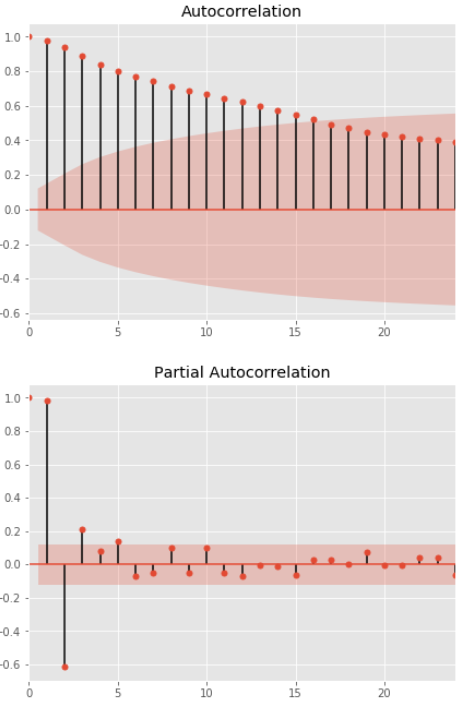

* Plotting the mean ACF for the Fort Worth Area shows a significant correlation to the previous time period with significant lags somewhere between 0 and 15. This is represented at q and seasonal Q within the model


* The initial PACF showed no significance. However, by subtracting 4 months from its current value, the PACF begins to reveal that PACF (p and Seasonal P) should play a role in selecting higher orders for this specific hyper-parameter. Ideally, somewhere between 0 and 6.


* Ideally, this would be done for each individual zip code as each one follows its own trend, and would result in differing p and q values.



# Model

* As observed from the decomposition graphs, the data needs to be adjusted for both seasonality and positive trends over time. This requires the use of the SARIMA approach to time series modeling, where seasonality must also be taken into account.


* The orders of hyper-parameters needed to fully complete an accurate prediction for each individual zip code require a high level of computational time and power. This was observed in many trial runs of a single zip code within the 'starter_notebook' located in this repository. Due to a time constraint, the hyper-parameter settings have been scaled down in hopes that lower orders will result in meaningful predictions across enough zip codes to provide accurate forecasts.


* p, P, q, Q range between 0-2. d and D range between 1-2

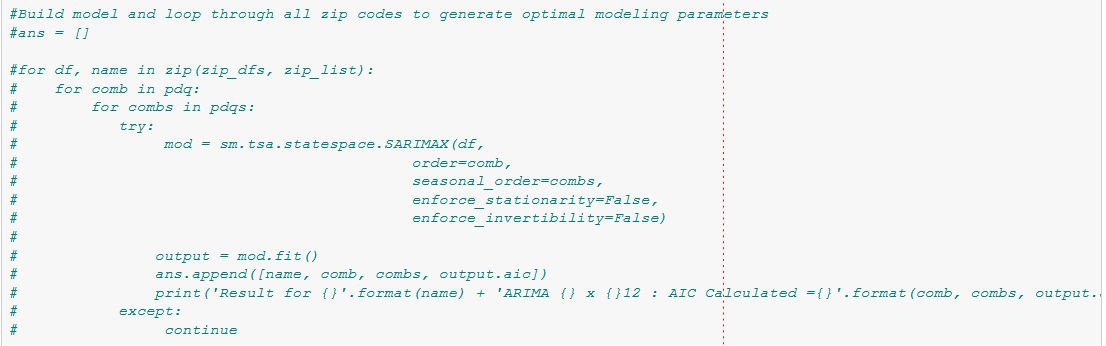

* This process took 26 hours to run.

# Forecast

* Optimal parameters for each zip code were selected and the model was rerun and predictions were made for the time frame between January 2015 to April 2018. 



* Mean squared errors were also calculated for each prediction to determine the accuracy of the modeling process.


* Unfortunately, setting the hyper-parameter orders lower to cut back on computing time resulted in adverse modeling predictions

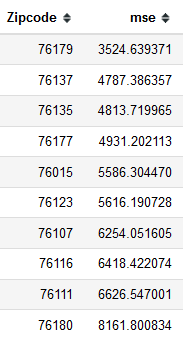

* Above are the lowest mse values calculated for Fort Worth zip codes.

* Visualizing these results will help determine how far off these predictions actually are.

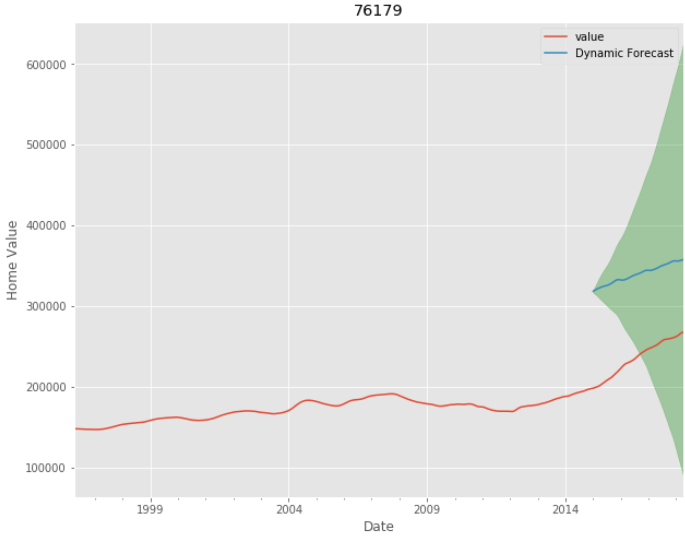



* From the above graphs, there clearly seems to be an issue with predicted home prices. Even though the trends seem to be somewhat accurate, the predicted values are much higher than they should be.


* Forecasting off of these highly inaccurate predictions will yield inaccurate future home prices. However, for the sake of completion 3 year forecasts will be made



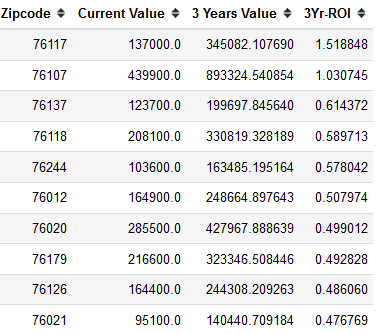

* The above df shows the 3 year home value forecast for each zip code along with their respective ROI. However, these values are known to be highly inaccurate. This is seen in the above visualizations where price predictions began at much higher values than where the actual home prices were documented.

# Conclusion

* Having used the SARIMA model for time series analysis on home values in the Fort Worth area, it is clear from the results that further model refinement must be performed. There are a variety of steps that will refine the model to make more accurate predictions moving forward. They include:


  * Refine the initial investment strategy to decrease number of zip codes to analyze
  * Increase the hyper-parameter search criteria allowing for more stationary time series and subsequently more    accurate inputs for the SARMIA model
  * Split the time series to test/train a model after the 2008 recession. This could potentially more accurately capture the post recession trend while allowing for better home price forecasting.
    
    
* In the sake of limited time, these model refinements will have to come at a later date. But, will result in much more accurate predictions. After these modifications are performed, the top 5 zip codes to invest for 3 year ROI can be recommended; it doesn't seem prudent at this time to provide investment advice with the current home price forecasts.

## Recommendations

* Once the model provides more accurate predictions, there are plenty of other considerations to incorporate into a housing investment strategy. These include integrating more data such as school ratings, demopgraphics, income levels, rent/own ratio, job opportunities, and nearby amenities to name a few. All of these variables can provide a much more accurate housing price evaluation for potential future investments within the target areas.

